# March 2019 North American Blizzard flights and weather EDA

## Preparation and data retrieval

### Imports

In [87]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from zipfile import * # package for unzipping zip files

In [88]:
# Importint get_engine and get_dataframe to retrieve data from an SQL database
from sql_functions import get_engine
from sql_functions import get_dataframe

In [89]:
# Importing datetime, matplotlib and seaborn for proper formatting and plotting
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### Path and download/unzipping

In [4]:
# Specifies path for saving file
path ='data/'

In [ ]:
 # Create the data folder
!mkdir {path}

In [6]:
# function to get specified csv file from the website https://transtats.bts.gov

def download_data(year, month):
    # Get the file from the website https://transtats.bts.gov
    zip_file = f'On_Time_Reporting_Carrier_On_Time_Performance_1987_present_{year}_{month}.zip'
    url = (f'https://transtats.bts.gov/PREZIP/{zip_file}')
    # Download the database
    r = requests.get(f'{url}', verify=False)
    # Save database to local file storage
    with open(path+zip_file, 'wb') as f:
        f.write(r.content)
        print(f'--> zip_file with name: {zip_file} downloaded succesfully.' )
    

In [7]:
# function to extract the csv files inside the zip files

def extract_zip(year, month):
    # Get the file from the website https://transtats.bts.gov
    zip_file = f'On_Time_Reporting_Carrier_On_Time_Performance_1987_present_{year}_{month}.zip'
    with ZipFile(path+zip_file, 'r') as zip_ref:
        zip_ref.extractall(path)
        csv_file =  zip_ref.namelist()[0]
        print(f'--> zip_file was succesfully extracted to: {csv_file}.' )

In [ ]:
download_data(2019,3)

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base2/lib/python3.9/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'transtats.bts.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


--> zip_file with name: On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2019_3.zip downloaded succesfully.


In [14]:
extract_zip(2019,3)

--> zip_file was succesfully extracted to: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_3.csv.


## Dataframe creation and cleaning

### Flights dataframe creation from csv

In [90]:
# define the name of the csv file you want to read in
csv_file = 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_3.csv'

# Read in your data
df = pd.read_csv(path+csv_file, low_memory = False)
display(df.shape)
display(df.head())

(632074, 110)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2019,1,3,30,6,2019-03-30,AA,19805,AA,N701UW,454,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,14524,1452401,34524,RIC,"Richmond, VA",VA,51,Virginia,38,730,726.0,-4.0,0.0,0.0,-1.0,0700-0759,11.0,737.0,824.0,6.0,839,830.0,-9.0,0.0,0.0,-1.0,0800-0859,0.0,NaN,0.0,69.0,64.0,47.0,1.0,257.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,3,31,7,2019-03-31,AA,19805,AA,N703UW,454,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,14524,1452401,34524,RIC,"Richmond, VA",VA,51,Virginia,38,730,730.0,0.0,0.0,0.0,0.0,0700-0759,15.0,745.0,832.0,4.0,839,836.0,-3.0,0.0,0.0,-1.0,0800-0859,0.0,NaN,0.0,69.0,66.0,47.0,1.0,257.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,3,1,5,2019-03-01,AA,19805,AA,N705UW,454,14524,1452401,34524,RIC,"Richmond, VA",VA,51,Virginia,38,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,918,915.0,-3.0,0.0,0.0,-1.0,0900-0959,33.0,948.0,1050.0,4.0,1050,1054.0,4.0,4.0,0.0,0.0,1000-1059,0.0,NaN,0.0,92.0,99.0,62.0,1.0,257.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,3,2,6,2019-03-02,AA,19805,AA,N715UW,454,14524,1452401,34524,RIC,"Richmond, VA",VA,51,Virginia,38,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,918,913.0,-5.0,0.0,0.0,-1.0,0900-0959,28.0,941.0,1044.0,8.0,1050,1052.0,2.0,2.0,0.0,0.0,1000-1059,0.0,NaN,0.0,92.0,99.0,63.0,1.0,257.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,3,3,7,2019-03-03,AA,19805,AA,N712US,454,14524,1452401,34524,RIC,"Richmond, VA",VA,51,Virginia,38,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,919,916.0,-3.0,0.0,0.0,-1.0,0900-0959,12.0,928.0,1030.0,5.0,1045,1035.0,-10.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,86.0,79.0,62.0,1.0,257.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [91]:
print(list(df.columns))

['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'FirstDepTime', 'TotalAddGTime'

### Preparing the csv file for further processing

In [92]:
# Columns from downloaded file that are to be kept

columns_to_keep = [
                'FlightDate',
                'DepTime',
                'CRSDepTime',
                'DepDelay',
                'ArrTime',
                'CRSArrTime',
                'ArrDelay',
                'Reporting_Airline',
                'Tail_Number',
                'Flight_Number_Reporting_Airline',
                'Origin',
                'Dest',
                'AirTime',
                'ActualElapsedTime',
                'Distance',
                'Cancelled',
                'Diverted'
]

In [93]:
# The columns in the database have different naming as in the source csv files. Lets get the names from the database

schema = 'hh_analytics_23_1' # UPDATE 'TABLE_SCHEMA' based on schema used in class 
engine = get_engine() # assign engine to be able to query against the database


In [94]:

table_name_sql = f'''SELECT COLUMN_NAME 
                    FROM INFORMATION_SCHEMA.COLUMNS 
                    WHERE TABLE_NAME = 'flights'
                    AND TABLE_SCHEMA ='{schema}'
                    ORDER BY ordinal_position'''
c_names = engine.execute(table_name_sql).fetchall()
c_names

[('flight_date',),
 ('dep_time',),
 ('sched_dep_time',),
 ('dep_delay',),
 ('arr_time',),
 ('sched_arr_time',),
 ('arr_delay',),
 ('airline',),
 ('tail_number',),
 ('flight_number',),
 ('origin',),
 ('dest',),
 ('air_time',),
 ('actual_elapsed_time',),
 ('distance',),
 ('cancelled',),
 ('diverted',)]

In [95]:
# we can clean up the results into a clean list
new_column_names=[]
for name in c_names:
    new_column_names.append(name[0])
new_column_names        

['flight_date',
 'dep_time',
 'sched_dep_time',
 'dep_delay',
 'arr_time',
 'sched_arr_time',
 'arr_delay',
 'airline',
 'tail_number',
 'flight_number',
 'origin',
 'dest',
 'air_time',
 'actual_elapsed_time',
 'distance',
 'cancelled',
 'diverted']

In [96]:
# Just in case the above fails here are the results
'''new_column_names_alternate = ['flight_date', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 
                'arr_delay', 'airline', 'tail_number', 'flight_number', 'origin', 'dest', 'air_time', 'actual_elapsed_time', 'distance', 'cancelled', 'diverted' ]'''

"new_column_names_alternate = ['flight_date', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', \n                'arr_delay', 'airline', 'tail_number', 'flight_number', 'origin', 'dest', 'air_time', 'actual_elapsed_time', 'distance', 'cancelled', 'diverted' ]"

In [97]:
def clean_airline_df(df):
    '''
    Transforms a df made from BTS csv file into a df that is ready to be uploaded to SQL
    Set rows=0 for no filtering
    '''

    # Build dataframe including only the columns you want to keep
    df_airline = df.loc[:,columns_to_keep]
     
    # Clean data types and NULLs
    df_airline['FlightDate']= pd.to_datetime(df_airline['FlightDate'], yearfirst=True)
    df_airline['CRSArrTime']= pd.to_numeric(df_airline['CRSArrTime'], downcast='integer', errors='coerce')
    df_airline['Cancelled']= pd.to_numeric(df_airline['Cancelled'], downcast='integer')
    df_airline['Diverted']= pd.to_numeric(df_airline['Diverted'], downcast='integer')
    df_airline['ActualElapsedTime']= pd.to_numeric(df_airline['ActualElapsedTime'], downcast='integer', errors='coerce')
    
    # Rename columns
    df_airline.columns = new_column_names
    
    return df_airline

In [98]:
# Call function and check resulting dataframe
df_clean = clean_airline_df(df)
df_clean.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
0,2019-03-30,726.0,730,-4.0,830.0,839,-9.0,AA,N701UW,454,CLT,RIC,47.0,64.0,257.0,0,0
1,2019-03-31,730.0,730,0.0,836.0,839,-3.0,AA,N703UW,454,CLT,RIC,47.0,66.0,257.0,0,0
2,2019-03-01,915.0,918,-3.0,1054.0,1050,4.0,AA,N705UW,454,RIC,CLT,62.0,99.0,257.0,0,0
3,2019-03-02,913.0,918,-5.0,1052.0,1050,2.0,AA,N715UW,454,RIC,CLT,63.0,99.0,257.0,0,0
4,2019-03-03,916.0,919,-3.0,1035.0,1045,-10.0,AA,N712US,454,RIC,CLT,62.0,79.0,257.0,0,0


In [99]:
# Specify the airports you are interested in and put them as a list in the function.
def select_airport(df, airports):
    ''' Helper function for filtering the airline dataframe for a subset of airports'''
    df_out = df.loc[(df.origin.isin(airports)) | (df.dest.isin(airports))]
    return df_out

In [126]:
# Execute function, filtering for DEN AFW BFF BHM and DSM airports, as those are in areas affected by the storm
airports=['DEN', 'DFW', 'OKC', 'BHM', 'DSM']
if len(airports) > 0:
    df_selected_airports = select_airport(df_clean, airports)
else:
    df_selected_airports = df_clean
    
df_selected_airports.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
64,2019-03-01,2213.0,2215,-2.0,6.0,6,0.0,AA,N196UW,456,DFW,SMF,207.0,233.0,1431.0,0,0
65,2019-03-02,2247.0,2215,32.0,50.0,6,44.0,AA,N919US,456,DFW,SMF,215.0,243.0,1431.0,0,0
66,2019-03-03,2222.0,2215,7.0,10.0,2,8.0,AA,N524UW,456,DFW,SMF,206.0,228.0,1431.0,0,0
67,2019-03-04,2212.0,2215,-3.0,4.0,2,2.0,AA,N563UW,456,DFW,SMF,212.0,232.0,1431.0,0,0
68,2019-03-05,2211.0,2215,-4.0,2351.0,2,-11.0,AA,N193UW,456,DFW,SMF,200.0,220.0,1431.0,0,0


In [127]:
# Check number of cancelled flights for our airports
df_selected_airports[df_selected_airports['cancelled'] == 1].shape

(3871, 17)

### Airport dataframe retrieval, cleaning and merging with flights

In [128]:
# Get airports dataframe for additional information
df_airports = get_dataframe(f'SELECT faa, lat, lon, name, city, tz FROM {schema}.airports')
df_airports.head()

,faa,lat,lon,name,city,tz
0,GKA,-6.081690,145.391998,Goroka Airport,Goroka,10.0
1,MAG,-5.207080,145.789001,Madang Airport,Madang,10.0
2,HGU,-5.826790,144.296005,Mount Hagen Kagamuga Airport,Mount Hagen,10.0
3,LAE,-6.569803,146.725977,Nadzab Airport,Nadzab,10.0
4,POM,-9.443380,147.220001,Port Moresby Jacksons International Airport,Port Moresby,10.0


In [129]:
# Merge origin airport information on flights
df_flights_airports_origin = df_selected_airports.merge(df_airports, how='left', left_on='origin', right_on='faa')

In [130]:
# Option to not truncate display of large dataframes
pd.set_option('display.max_columns', None)
df_flights_airports_origin.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted,faa,lat,lon,name,city,tz
0,2019-03-01,2213.0,2215,-2.0,6.0,6,0.0,AA,N196UW,456,DFW,SMF,207.0,233.0,1431.0,0,0,DFW,32.896801,-97.038002,Dallas Fort Worth International Airport,Dallas-Fort Worth,-6.0
1,2019-03-02,2247.0,2215,32.0,50.0,6,44.0,AA,N919US,456,DFW,SMF,215.0,243.0,1431.0,0,0,DFW,32.896801,-97.038002,Dallas Fort Worth International Airport,Dallas-Fort Worth,-6.0
2,2019-03-03,2222.0,2215,7.0,10.0,2,8.0,AA,N524UW,456,DFW,SMF,206.0,228.0,1431.0,0,0,DFW,32.896801,-97.038002,Dallas Fort Worth International Airport,Dallas-Fort Worth,-6.0
3,2019-03-04,2212.0,2215,-3.0,4.0,2,2.0,AA,N563UW,456,DFW,SMF,212.0,232.0,1431.0,0,0,DFW,32.896801,-97.038002,Dallas Fort Worth International Airport,Dallas-Fort Worth,-6.0
4,2019-03-05,2211.0,2215,-4.0,2351.0,2,-11.0,AA,N193UW,456,DFW,SMF,200.0,220.0,1431.0,0,0,DFW,32.896801,-97.038002,Dallas Fort Worth International Airport,Dallas-Fort Worth,-6.0


In [131]:
# Merge destination airport information on flights
df_all = df_flights_airports_origin.merge(df_airports, how='left', left_on='dest', right_on='faa', suffixes=('_origin', '_dest'))

### Cleaning of final flights dataframe

In [132]:
# Filter for the relevant dates
df_all = df_all[(df_all['flight_date']>=dt.datetime(2019,3,5)) & (df_all['flight_date']<=dt.datetime(2019,3,20))].sort_values(['flight_date', 'sched_dep_time']).reset_index().drop(columns='index')

In [133]:
# length for np.where
length = np.vectorize(len)

In [134]:
# Converting military time columns to datetime
# Convert 24h to one minute earlier
df_all['dep_time'] = np.where(df_all['dep_time'] == 2400, 2359, df_all['dep_time'])
# Turning military time into string format for comparison with API output.
# 0 means cancelled flight.
df_all['dep_hours'] = (df_all['dep_time'].fillna(0) // 100).astype(int).astype(str)
df_all['dep_mins'] = (df_all['dep_time'].fillna(0) % 100).astype(int).astype(str)
df_all['dep_hours'] = np.where(length(df_all['dep_hours']) == 1, '0'+df_all['dep_hours'], df_all['dep_hours'])
df_all['dep_mins'] = np.where(length(df_all['dep_mins']) == 1, '0'+df_all['dep_mins'], df_all['dep_mins'])
df_all['dep_time_str'] = df_all['dep_hours']+':'+df_all['dep_mins']+':00'
df_all['dep_time_str'] = df_all['flight_date'].astype(str) +' '+ df_all['dep_time_str']
df_all['dep_time'] = pd.to_datetime(df_all['dep_time_str'], format="%Y-%m-%d %H:%M:%S")

In [135]:
# Convert 24h to one minute earlier
df_all['arr_time'] = np.where(df_all['arr_time'] == 2400, 2359, df_all['arr_time'])
# Turning military time into string format for comparison with API output.
# 0 means cancelled flight.
df_all['arr_hours'] = (df_all['arr_time'].fillna(0) // 100).astype(int).astype(str)
df_all['arr_mins'] = (df_all['arr_time'].fillna(0) % 100).astype(int).astype(str)
df_all['arr_hours'] = np.where(length(df_all['arr_hours']) == 1, '0'+df_all['arr_hours'], df_all['arr_hours'])
df_all['arr_mins'] = np.where(length(df_all['arr_mins']) == 1, '0'+df_all['arr_mins'], df_all['arr_mins'])
df_all['arr_time_str'] = df_all['arr_hours']+':'+df_all['arr_mins']+':00'
df_all['arr_time_str'] = df_all['flight_date'].astype(str) +' '+ df_all['arr_time_str']
df_all['arr_time'] = pd.to_datetime(df_all['arr_time_str'], format="%Y-%m-%d %H:%M:%S")

In [136]:
# Convert 24h to one minute earlier
df_all['sched_dep_time'] = np.where(df_all['sched_dep_time'] == 2400, 2359, df_all['sched_dep_time'])
# Turning military time into string format for comparison with API output.
# 0 means cancelled flight.
df_all['sched_dep_hours'] = (df_all['sched_dep_time'].fillna(0) // 100).astype(int).astype(str)
df_all['sched_dep_mins'] = (df_all['sched_dep_time'].fillna(0) % 100).astype(int).astype(str)
df_all['sched_dep_hours'] = np.where(length(df_all['sched_dep_hours']) == 1, '0'+df_all['sched_dep_hours'], df_all['sched_dep_hours'])
df_all['sched_dep_mins'] = np.where(length(df_all['sched_dep_mins']) == 1, '0'+df_all['sched_dep_mins'], df_all['sched_dep_mins'])
df_all['sched_dep_str'] = df_all['sched_dep_hours']+':'+df_all['sched_dep_mins']+':00'
df_all['sched_dep_str'] = df_all['flight_date'].astype(str) +' '+ df_all['sched_dep_str']
df_all['sched_dep_time'] = pd.to_datetime(df_all['sched_dep_str'], format="%Y-%m-%d %H:%M:%S")

In [137]:
# Convert 24h to one minute earlier
df_all['sched_arr_time'] = np.where(df_all['sched_arr_time'] == 2400, 2359, df_all['sched_arr_time'])
# Turning military time into string format for comparison with API output.
# 0 means cancelled flight.
df_all['sched_arr_hours'] = (df_all['sched_arr_time'].fillna(0) // 100).astype(int).astype(str)
df_all['sched_arr_mins'] = (df_all['sched_arr_time'].fillna(0) % 100).astype(int).astype(str)
df_all['sched_arr_hours'] = np.where(length(df_all['sched_arr_hours']) == 1, '0'+df_all['sched_arr_hours'], df_all['sched_arr_hours'])
df_all['sched_arr_mins'] = np.where(length(df_all['sched_arr_mins']) == 1, '0'+df_all['sched_arr_mins'], df_all['sched_arr_mins'])
df_all['sched_arr_str'] = df_all['sched_arr_hours']+':'+df_all['sched_arr_mins']+':00'
df_all['sched_arr_str'] = df_all['flight_date'].astype(str) +' '+ df_all['sched_arr_str']
df_all['sched_arr_time'] = pd.to_datetime(df_all['sched_arr_str'], format="%Y-%m-%d %H:%M:%S")

## EDA of flights dataframe

### Counting to see how big our sample sizes are

In [143]:
# Count of flights departing in our airports
pd.DataFrame(df_all.loc[(df_all.origin.isin(airports))].groupby(['faa_origin']).count()['flight_date'])

,flight_date
faa_origin,
BHM,828
DEN,10513
DFW,12730
DSM,778
OKC,1031


In [144]:
# Count of flights arriving in our airports
pd.DataFrame(df_all.loc[(df_all.dest.isin(airports))].groupby(['faa_dest']).count()['flight_date'])

,flight_date
faa_dest,
BHM,829
DEN,10507
DFW,12729
DSM,778
OKC,1032


### Groupbys with cancelled percentages for origin airports

In [145]:
# Percentage of flights cancelled per day per origin airport
pd.set_option('display.max_rows', None)
pd.DataFrame(df_all.loc[(df_all.origin.isin(airports))].groupby(['flight_date', 'faa_origin']).mean()[['cancelled']])

/var/folders/p6/1976999n4hg4_sd625stj60m0000gn/T/ipykernel_5469/2326137996.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(df_all.loc[(df_all.origin.isin(airports))].groupby(['flight_date', 'faa_origin']).mean()[['cancelled']])


cancelled
flight_date faa_origin           
2019-03-05  BHM          0.000000
            DEN          0.003284
            DFW          0.002574
            DSM          0.000000
            OKC          0.000000
2019-03-06  BHM          0.000000
            DEN          0.012759
            DFW          0.000000
            DSM          0.000000
            OKC          0.015625
2019-03-07  BHM          0.018868
            DEN          0.013575
            DFW          0.024067
            DSM          0.000000
            OKC          0.000000
2019-03-08  BHM          0.000000
            DEN          0.026510
            DFW          0.040816
            DSM          0.000000
            OKC          0.014925
2019-03-09  BHM          0.026316
            DEN          0.025126
            DFW          0.072569
            DSM          0.023810
            OKC          0.018182
2019-03-10  BHM          0.019608
            DEN          0.015038
            DFW          0.032178
            DSM          0.000000
            OKC          0.030303
2019-03-11  BHM          0.053571
            DEN          0.020558
            DFW          0.039711
            DSM          0.020408
            OKC          0.000000
2019-03-12  BHM          0.037736
            DEN          0.018045
            DFW          0.051216
            DSM          0.000000
            OKC          0.062500
2019-03-13  BHM          0.055556
            DEN          0.850969
            DFW          0.159204
            DSM          0.090909
            OKC          0.123077
2019-03-14  BHM          0.054545
            DEN          0.423133
            DFW          0.058753
            DSM          0.102041
            OKC          0.073529
2019-03-15  BHM          0.035714
            DEN          0.022026
            DFW          0.033573
            DSM          0.000000
            OKC          0.029851
2019-03-16  BHM          0.026316
            DEN          0.023140
            DFW          0.024602
            DSM          0.000000
            OKC          0.054545
2019-03-17  BHM          0.019231
            DEN          0.023881
            DFW          0.024722
            DSM          0.020833
            OKC          0.029851
2019-03-18  BHM          0.017857
            DEN          0.036711
            DFW          0.003632
            DSM          0.020408
            OKC          0.014925
2019-03-19  BHM          0.000000
            DEN          0.028614
            DFW          0.014121
            DSM          0.000000
            OKC          0.000000
2019-03-20  BHM          0.000000
            DEN          0.020833
            DFW          0.018773
            DSM          0.000000
            OKC          0.015385

In [146]:
# Closer look at Denver on March 13
date = df_all.flight_date
den_0313 = df_all[(df_all['faa_origin'] == 'DEN') & (df_all['flight_date'] == '2019-03-13')].groupby(df_all['sched_dep_time'].dt.hour).mean(numeric_only=True)[['cancelled']]
den_0313

,cancelled
sched_dep_time,
0,0.000000
1,0.000000
5,0.000000
6,0.096774
7,0.189189
8,0.580000
9,0.918367
10,1.000000
11,1.000000


In [147]:
# Closer look at Denver on March 14
date = df_all.flight_date
den_0314 = df_all[(df_all['faa_origin'] == 'DEN') & (df_all['flight_date'] == '2019-03-14')].groupby(df_all['sched_dep_time'].dt.hour).mean(numeric_only=True)[['cancelled']]
den_0314

,cancelled
sched_dep_time,
0,1.000000
1,1.000000
5,0.923077
6,0.677419
7,0.675676
8,0.865385
9,0.750000
10,0.769231
11,0.484848


In [148]:
# Closer look at Dallas-Fort Worth on March 13
date = df_all.flight_date
dfw_0313 = df_all[(df_all['faa_origin'] == 'DFW') & (df_all['flight_date'] == '2019-03-13')].groupby(df_all['sched_dep_time'].dt.hour).mean(numeric_only=True)[['cancelled']]
dfw_0313

,cancelled
sched_dep_time,
5,0.000000
6,0.320000
7,0.185185
8,0.183673
9,0.145833
10,0.179487
11,0.107143
12,0.150685
13,0.037037


In [149]:
# Closer look at Dallas-Fort Worth on March 14
date = df_all.flight_date
dfw_0314 = df_all[(df_all['faa_origin'] == 'DFW') & (df_all['flight_date'] == '2019-03-14')].groupby(df_all['sched_dep_time'].dt.hour).mean(numeric_only=True)[['cancelled']]
dfw_0314

,cancelled
sched_dep_time,
5,0.200000
6,0.148148
7,0.127273
8,0.074074
9,0.092593
10,0.025316
11,0.000000
12,0.040541
13,0.035714


In [150]:
den_dfw_0313 = den_0313.merge(dfw_0313, on='sched_dep_time', how='left', suffixes=('_den','_dfw'))
den_dfw_0313

,cancelled_den,cancelled_dfw
sched_dep_time,,
0,0.000000,NaN
1,0.000000,NaN
5,0.000000,0.000000
6,0.096774,0.320000
7,0.189189,0.185185
8,0.580000,0.183673
9,0.918367,0.145833
10,1.000000,0.179487
11,1.000000,0.107143


In [151]:
den_dfw_0314 = den_0314.merge(dfw_0314, on='sched_dep_time', how='left', suffixes=('_den','_dfw'))
den_dfw_0314

,cancelled_den,cancelled_dfw
sched_dep_time,,
0,1.000000,NaN
1,1.000000,NaN
5,0.923077,0.200000
6,0.677419,0.148148
7,0.675676,0.127273
8,0.865385,0.074074
9,0.750000,0.092593
10,0.769231,0.025316
11,0.484848,0.000000


### Plotting origin insights

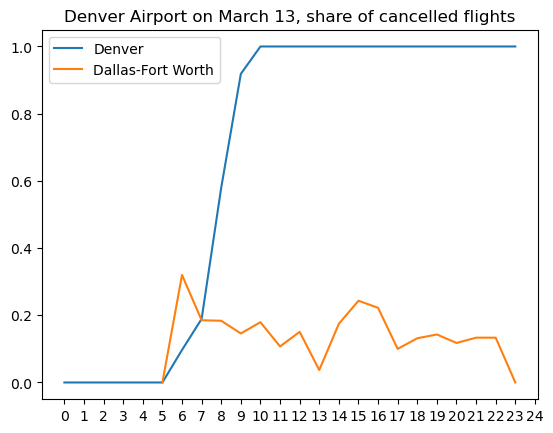

In [152]:
# Plot of Denver Airport cancelled flight hour groupby for March 13
plt.title('Denver Airport on March 13, share of cancelled flights')
plt.xticks(ticks=range(25))
plt.plot(den_dfw_0313)
plt.legend(['Denver', 'Dallas-Fort Worth'])
plt.show()

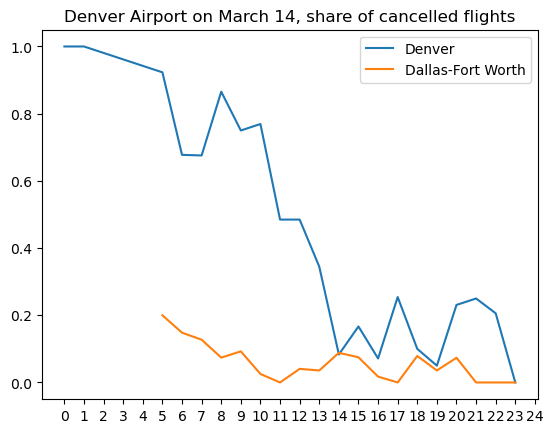

In [153]:
# Plot of cancelled flight groupby March 14
plt.title('Denver Airport on March 14, share of cancelled flights')
plt.xticks(ticks=range(25))
plt.plot(den_dfw_0314)
plt.legend(['Denver', 'Dallas-Fort Worth'])
plt.show()

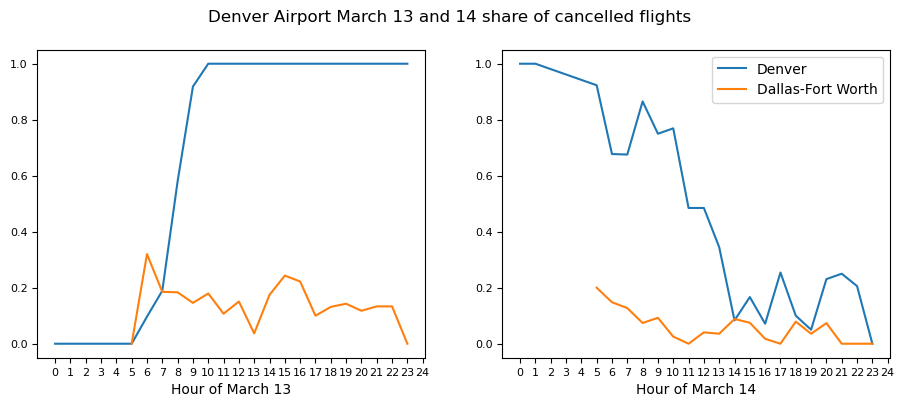

In [154]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11,4))
fig.suptitle('Denver Airport March 13 and 14 share of cancelled flights')
plt.setp([ax1, ax2], xticks=range(25))
ax1.tick_params(labelsize=8)
ax2.tick_params(labelsize=8)
ax1.set_xlabel('Hour of March 13')
ax2.set_xlabel('Hour of March 14')
ax1.plot(den_dfw_0313)
ax2.plot(den_dfw_0314)
ax2.legend(['Denver', 'Dallas-Fort Worth'])
plt.show()

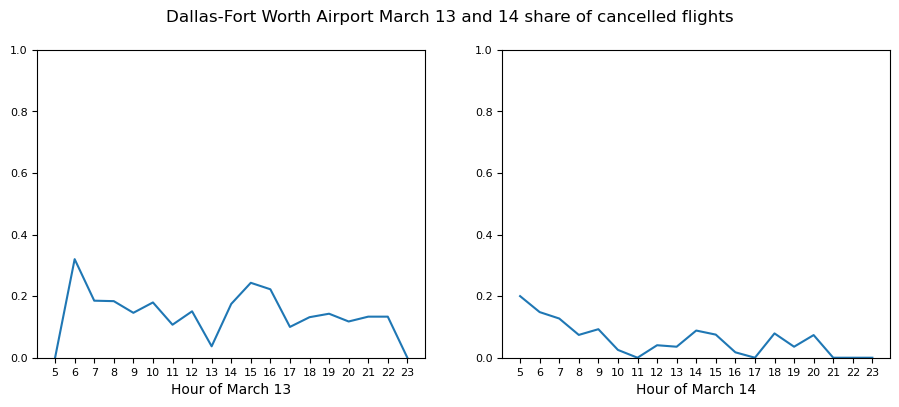

In [155]:
# Combined plot for DFW
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11,4))
fig.suptitle('Dallas-Fort Worth Airport March 13 and 14 share of cancelled flights')
plt.setp([ax1, ax2], xticks=range(25))
ax1.tick_params(labelsize=8)
ax2.tick_params(labelsize=8)
ax1.set_xlabel('Hour of March 13')
ax2.set_xlabel('Hour of March 14')
ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])
ax1.plot(dfw_0313)
ax2.plot(dfw_0314)
plt.show()

### Groupbys for destination flights cancellations

In [157]:
# Percentage of flights cancelled per day per destination airport
pd.set_option('display.max_rows', None)
pd.DataFrame(df_all.loc[(df_all.dest.isin(airports))].groupby(['flight_date', 'faa_dest']).mean()[['cancelled']])

/var/folders/p6/1976999n4hg4_sd625stj60m0000gn/T/ipykernel_5469/2759869774.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(df_all.loc[(df_all.dest.isin(airports))].groupby(['flight_date', 'faa_dest']).mean()[['cancelled']])


cancelled
flight_date faa_dest           
2019-03-05  BHM        0.019608
            DEN        0.004902
            DFW        0.002574
            DSM        0.000000
            OKC        0.000000
2019-03-06  BHM        0.000000
            DEN        0.007974
            DFW        0.006211
            DSM        0.000000
            OKC        0.000000
2019-03-07  BHM        0.018519
            DEN        0.022659
            DFW        0.019300
            DSM        0.000000
            OKC        0.000000
2019-03-08  BHM        0.000000
            DEN        0.023669
            DFW        0.033694
            DSM        0.000000
            OKC        0.014925
2019-03-09  BHM        0.052632
            DEN        0.028620
            DFW        0.082133
            DSM        0.024390
            OKC        0.000000
2019-03-10  BHM        0.019608
            DEN        0.012012
            DFW        0.038557
            DSM        0.000000
            OKC        0.015152
2019-03-11  BHM        0.053571
            DEN        0.019146
            DFW        0.044471
            DSM        0.020408
            OKC        0.000000
2019-03-12  BHM        0.037736
            DEN        0.013514
            DFW        0.040973
            DSM        0.000000
            OKC        0.046875
2019-03-13  BHM        0.037037
            DEN        0.846498
            DFW        0.142857
            DSM        0.072727
            OKC        0.138462
2019-03-14  BHM        0.072727
            DEN        0.446559
            DFW        0.078125
            DSM        0.102041
            OKC        0.044118
2019-03-15  BHM        0.053571
            DEN        0.026354
            DFW        0.040767
            DSM        0.000000
            OKC        0.044776
2019-03-16  BHM        0.026316
            DEN        0.028192
            DFW        0.025974
            DSM        0.000000
            OKC        0.036364
2019-03-17  BHM        0.019231
            DEN        0.028443
            DFW        0.019827
            DSM        0.000000
            OKC        0.029851
2019-03-18  BHM        0.000000
            DEN        0.035294
            DFW        0.004848
            DSM        0.020408
            OKC        0.014925
2019-03-19  BHM        0.000000
            DEN        0.027068
            DFW        0.019231
            DSM        0.000000
            OKC        0.000000
2019-03-20  BHM        0.018519
            DEN        0.023810
            DFW        0.022500
            DSM        0.000000
            OKC        0.015385

### Delay sum in origin airpots

In [160]:
# Sum of delay on the worst storm day
pd.set_option('display.max_rows', None)
pd.DataFrame(df_all.loc[(df_all.origin.isin(airports))].groupby(['flight_date', 'faa_origin']).sum()[['dep_delay']])

/var/folders/p6/1976999n4hg4_sd625stj60m0000gn/T/ipykernel_5469/3572982267.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(df_all.loc[(df_all.origin.isin(airports))].groupby(['flight_date', 'faa_origin']).sum()[['dep_delay']])


dep_delay
flight_date faa_origin           
2019-03-05  BHM             308.0
            DEN            3467.0
            DFW            5414.0
            DSM             -44.0
            OKC             310.0
2019-03-06  BHM              -1.0
            DEN            3869.0
            DFW            4709.0
            DSM            -105.0
            OKC            -238.0
2019-03-07  BHM             395.0
            DEN            6946.0
            DFW            9265.0
            DSM             358.0
            OKC             581.0
2019-03-08  BHM             595.0
            DEN            5845.0
            DFW            4325.0
            DSM             387.0
            OKC             238.0
2019-03-09  BHM             740.0
            DEN           13482.0
            DFW           36199.0
            DSM             583.0
            OKC            2692.0
2019-03-10  BHM             728.0
            DEN           11947.0
            DFW           16530.0
            DSM             320.0
            OKC             555.0
2019-03-11  BHM             555.0
            DEN            7013.0
            DFW           10494.0
            DSM             510.0
            OKC             366.0
2019-03-12  BHM              10.0
            DEN            6056.0
            DFW           10734.0
            DSM            -129.0
            OKC             950.0
2019-03-13  BHM            1513.0
            DEN             590.0
            DFW           50043.0
            DSM             494.0
            OKC            2605.0
2019-03-14  BHM             499.0
            DEN           40780.0
            DFW           18099.0
            DSM            1573.0
            OKC            1731.0
2019-03-15  BHM             775.0
            DEN           14710.0
            DFW           12136.0
            DSM             405.0
            OKC             197.0
2019-03-16  BHM             258.0
            DEN            8425.0
            DFW            3462.0
            DSM             440.0
            OKC             262.0
2019-03-17  BHM             198.0
            DEN            4789.0
            DFW            5810.0
            DSM            -116.0
            OKC             414.0
2019-03-18  BHM              90.0
            DEN            3602.0
            DFW            6587.0
            DSM            -121.0
            OKC               7.0
2019-03-19  BHM            -157.0
            DEN             883.0
            DFW            2263.0
            DSM            -228.0
            OKC             145.0
2019-03-20  BHM             116.0
            DEN            3376.0
            DFW            3139.0
            DSM             269.0
            OKC             293.0

In [161]:
# Creating new columns for flights with over 60 minutes delay
df_all['delay_over_60'] = np.where(df_all['dep_delay'] >= 60, 1, 0)

In [162]:
# Percentage of flights delayed more than 60 minutes per day per origin airport
pd.set_option('display.max_rows', None)
pd.DataFrame(df_all[(df_all.origin.isin(airports)) & (df_all['cancelled'] == 0)].groupby(['flight_date', 'faa_origin']).mean(numeric_only=True)[['delay_over_60']])

delay_over_60
flight_date faa_origin               
2019-03-05  BHM              0.039216
            DEN              0.037891
            DFW              0.038710
            DSM              0.020833
            OKC              0.047619
2019-03-06  BHM              0.000000
            DEN              0.040388
            DFW              0.046020
            DSM              0.020000
            OKC              0.000000
2019-03-07  BHM              0.038462
            DEN              0.056575
            DFW              0.073983
            DSM              0.040816
            OKC              0.059701
2019-03-08  BHM              0.035714
            DEN              0.051437
            DFW              0.027534
            DSM              0.062500
            OKC              0.030303
2019-03-09  BHM              0.135135
            DEN              0.101375
            DFW              0.336463
            DSM              0.121951
            OKC              0.203704
2019-03-10  BHM              0.120000
            DEN              0.096183
            DFW              0.129156
            DSM              0.083333
            OKC              0.062500
2019-03-11  BHM              0.075472
            DEN              0.056972
            DFW              0.065163
            DSM              0.062500
            OKC              0.029851
2019-03-12  BHM              0.019608
            DEN              0.053599
            DFW              0.079622
            DSM              0.020833
            OKC              0.100000
2019-03-13  BHM              0.117647
            DEN              0.010000
            DFW              0.485207
            DSM              0.080000
            OKC              0.192982
2019-03-14  BHM              0.057692
            DEN              0.477157
            DFW              0.129936
            DSM              0.204545
            OKC              0.111111
2019-03-15  BHM              0.111111
            DEN              0.111111
            DFW              0.074442
            DSM              0.040816
            OKC              0.015385
2019-03-16  BHM              0.054054
            DEN              0.057530
            DFW              0.029674
            DSM              0.090909
            OKC              0.019231
2019-03-17  BHM              0.039216
            DEN              0.038226
            DFW              0.051965
            DSM              0.000000
            OKC              0.046154
2019-03-18  BHM              0.018182
            DEN              0.041159
            DFW              0.048603
            DSM              0.000000
            OKC              0.015152
2019-03-19  BHM              0.018868
            DEN              0.013953
            DFW              0.029948
            DSM              0.000000
            OKC              0.031250
2019-03-20  BHM              0.037037
            DEN              0.034954
            DFW              0.035714
            DSM              0.037037
            OKC              0.031250

In [163]:
# Creating new columns for flights with over 60 minutes delay
df_all['actual_dep_delay'] = np.where(df_all['dep_delay'] > 0,df_all['dep_delay'] ,0 )

In [164]:
# Sum of delay on the worst storm day
pd.set_option('display.max_rows', None)
pd.DataFrame(df_all.loc[(df_all.origin.isin(airports))].groupby(['flight_date', 'faa_origin']).sum()[['actual_dep_delay']])

/var/folders/p6/1976999n4hg4_sd625stj60m0000gn/T/ipykernel_5469/3809931280.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(df_all.loc[(df_all.origin.isin(airports))].groupby(['flight_date', 'faa_origin']).sum()[['actual_dep_delay']])


actual_dep_delay
flight_date faa_origin                  
2019-03-05  BHM                    519.0
            DEN                   5177.0
            DFW                   7524.0
            DSM                    180.0
            OKC                    592.0
2019-03-06  BHM                    190.0
            DEN                   5504.0
            DFW                   7008.0
            DSM                    143.0
            OKC                     97.0
2019-03-07  BHM                    532.0
            DEN                   8215.0
            DFW                  11013.0
            DSM                    551.0
            OKC                    856.0
2019-03-08  BHM                    742.0
            DEN                   7282.0
            DFW                   6456.0
            DSM                    584.0
            OKC                    486.0
2019-03-09  BHM                    839.0
            DEN                  14604.0
            DFW                  36559.0
            DSM                    719.0
            OKC                   2820.0
2019-03-10  BHM                    855.0
            DEN                  12857.0
            DFW                  17632.0
            DSM                    541.0
            OKC                    755.0
2019-03-11  BHM                    644.0
            DEN                   8614.0
            DFW                  12136.0
            DSM                    814.0
            OKC                    605.0
2019-03-12  BHM                    223.0
            DEN                   7656.0
            DFW                  11988.0
            DSM                    150.0
            OKC                   1112.0
2019-03-13  BHM                   1649.0
            DEN                    735.0
            DFW                  50340.0
            DSM                    708.0
            OKC                   2682.0
2019-03-14  BHM                    667.0
            DEN                  40843.0
            DFW                  19293.0
            DSM                   1698.0
            OKC                   1867.0
2019-03-15  BHM                    867.0
            DEN                  15563.0
            DFW                  13749.0
            DSM                    574.0
            OKC                    430.0
2019-03-16  BHM                    389.0
            DEN                   9419.0
            DFW                   5642.0
            DSM                    554.0
            OKC                    435.0
2019-03-17  BHM                    355.0
            DEN                   6407.0
            DFW                   8148.0
            DSM                    122.0
            OKC                    629.0
2019-03-18  BHM                    295.0
            DEN                   5560.0
            DFW                   8965.0
            DSM                    140.0
            OKC                    295.0
2019-03-19  BHM                    102.0
            DEN                   2897.0
            DFW                   5040.0
            DSM                    113.0
            OKC                    479.0
2019-03-20  BHM                    352.0
            DEN                   5372.0
            DFW                   5800.0
            DSM                    564.0
            OKC                    579.0

### Delay sum in destination airports

In [165]:
# Sum of destination delays on the worst storm day
pd.set_option('display.max_rows', None)
pd.DataFrame(df_all.loc[(df_all.dest.isin(airports))].groupby(['flight_date', 'faa_dest']).sum()[['dep_delay']])

/var/folders/p6/1976999n4hg4_sd625stj60m0000gn/T/ipykernel_5469/1424612307.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(df_all.loc[(df_all.dest.isin(airports))].groupby(['flight_date', 'faa_dest']).sum()[['dep_delay']])


dep_delay
flight_date faa_dest           
2019-03-05  BHM           203.0
            DEN          3872.0
            DFW          4948.0
            DSM            91.0
            OKC           387.0
2019-03-06  BHM           186.0
            DEN          4893.0
            DFW          2411.0
            DSM           -19.0
            OKC           393.0
2019-03-07  BHM            22.0
            DEN          9863.0
            DFW          6259.0
            DSM           326.0
            OKC           578.0
2019-03-08  BHM            38.0
            DEN          5248.0
            DFW          4232.0
            DSM           666.0
            OKC           706.0
2019-03-09  BHM           693.0
            DEN         10490.0
            DFW         31059.0
            DSM           495.0
            OKC          1614.0
2019-03-10  BHM          1069.0
            DEN          9265.0
            DFW         13575.0
            DSM           737.0
            OKC          1138.0
2019-03-11  BHM           579.0
            DEN          4495.0
            DFW          5571.0
            DSM           433.0
            OKC           393.0
2019-03-12  BHM           178.0
            DEN          5710.0
            DFW          8636.0
            DSM            29.0
            OKC          1096.0
2019-03-13  BHM           604.0
            DEN          5304.0
            DFW         37461.0
            DSM           914.0
            OKC          1796.0
2019-03-14  BHM           647.0
            DEN         23074.0
            DFW         15007.0
            DSM          1954.0
            OKC          1079.0
2019-03-15  BHM           838.0
            DEN         11166.0
            DFW         14154.0
            DSM           835.0
            OKC           799.0
2019-03-16  BHM           382.0
            DEN          5308.0
            DFW          4171.0
            DSM           453.0
            OKC           436.0
2019-03-17  BHM           326.0
            DEN          2316.0
            DFW          6321.0
            DSM           148.0
            OKC           240.0
2019-03-18  BHM           175.0
            DEN          2448.0
            DFW          3183.0
            DSM            23.0
            OKC           190.0
2019-03-19  BHM            -6.0
            DEN          -887.0
            DFW          3160.0
            DSM           109.0
            OKC           170.0
2019-03-20  BHM           310.0
            DEN          3118.0
            DFW          1733.0
            DSM           171.0
            OKC           583.0

In [166]:
df_all.head()

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted,faa_origin,lat_origin,lon_origin,name_origin,city_origin,tz_origin,faa_dest,lat_dest,lon_dest,name_dest,city_dest,tz_dest,dep_hours,dep_mins,dep_time_str,arr_hours,arr_mins,arr_time_str,sched_dep_hours,sched_dep_mins,sched_dep_str,sched_arr_hours,sched_arr_mins,sched_arr_str,delay_over_60,actual_dep_delay
0,2019-03-05,2019-03-05 00:03:00,2019-03-05 00:04:00,-1.0,2019-03-05 05:30:00,2019-03-05 05:50:00,-20.0,AA,N949AN,2473,SEA,DFW,184.0,207.0,1660.0,0,0,SEA,47.449001,-122.308998,Seattle Tacoma International Airport,Seattle,-8.0,DFW,32.896801,-97.038002,Dallas Fort Worth International Airport,Dallas-Fort Worth,-6.0,00,03,2019-03-05 00:03:00,05,30,2019-03-05 05:30:00,00,04,2019-03-05 00:04:00,05,50,2019-03-05 05:50:00,0,0.0
1,2019-03-05,2019-03-05 01:05:00,2019-03-05 00:05:00,60.0,2019-03-05 05:59:00,2019-03-05 05:28:00,31.0,F9,N223FR,292,DEN,TPA,157.0,174.0,1506.0,0,0,DEN,39.861698,-104.672997,Denver International Airport,Denver,-7.0,TPA,27.975500,-82.533203,Tampa International Airport,Tampa,-5.0,01,05,2019-03-05 01:05:00,05,59,2019-03-05 05:59:00,00,05,2019-03-05 00:05:00,05,28,2019-03-05 05:28:00,1,60.0
2,2019-03-05,2019-03-05 00:09:00,2019-03-05 00:09:00,0.0,2019-03-05 05:24:00,2019-03-05 05:30:00,-6.0,AA,N139AN,1004,SFO,DFW,162.0,195.0,1464.0,0,0,SFO,37.618999,-122.375000,San Francisco International Airport,San Francisco,-8.0,DFW,32.896801,-97.038002,Dallas Fort Worth International Airport,Dallas-Fort Worth,-6.0,00,09,2019-03-05 00:09:00,05,24,2019-03-05 05:24:00,00,09,2019-03-05 00:09:00,05,30,2019-03-05 05:30:00,0,0.0
3,2019-03-05,2019-03-05 00:17:00,2019-03-05 00:20:00,-3.0,2019-03-05 05:31:00,2019-03-05 05:51:00,-20.0,AA,N572UW,2186,DEN,PHL,170.0,194.0,1558.0,0,0,DEN,39.861698,-104.672997,Denver International Airport,Denver,-7.0,PHL,39.871899,-75.241096,Philadelphia International Airport,Philadelphia,-5.0,00,17,2019-03-05 00:17:00,05,31,2019-03-05 05:31:00,00,20,2019-03-05 00:20:00,05,51,2019-03-05 05:51:00,0,0.0
4,2019-03-05,2019-03-05 01:37:00,2019-03-05 00:52:00,45.0,2019-03-05 06:42:00,2019-03-05 06:30:00,12.0,F9,N719FR,680,DEN,MCO,163.0,185.0,1546.0,0,0,DEN,39.861698,-104.672997,Denver International Airport,Denver,-7.0,MCO,28.429399,-81.308998,Orlando International Airport,Orlando,-5.0,01,37,2019-03-05 01:37:00,06,42,2019-03-05 06:42:00,00,52,2019-03-05 00:52:00,06,30,2019-03-05 06:30:00,0,45.0


In [167]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50352 entries, 0 to 50351
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   flight_date          50352 non-null  datetime64[ns]
 1   dep_time             50352 non-null  datetime64[ns]
 2   sched_dep_time       50352 non-null  datetime64[ns]
 3   dep_delay            47292 non-null  float64       
 4   arr_time             50352 non-null  datetime64[ns]
 5   sched_arr_time       50352 non-null  datetime64[ns]
 6   arr_delay            47141 non-null  float64       
 7   airline              50352 non-null  object        
 8   tail_number          49334 non-null  object        
 9   flight_number        50352 non-null  int64         
 10  origin               50352 non-null  object        
 11  dest                 50352 non-null  object        
 12  air_time             47141 non-null  float64       
 13  actual_elapsed_time  47141 non-

## 3. Push the prepared data to a table in the database

In [39]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
# Example: flights_sp for Sina's flights table, flights_groupname or similar
table_name = 'flights_201903nab'


In [ ]:
# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        df_selected_airports.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

In [17]:
# Just to be sure: Check if the number of rows match
table_name_sql = f'''SELECT count(*) 
                    FROM {schema}.{table_name}
                    '''
engine.execute(table_name_sql).fetchall()[0][0] == df_selected_airports.shape[0]

True